## Airline Passenger Satisfaction Data Analysis and Visualisation Project
**Team #27:** [Maryna Kostiuk](https://github.com/samamaryna), [Ying Li](https://github.com/yingliamanda), [Yinglin Zhang](https://github.com/Jolin0101), [Tetiana Nurkanova](https://github.com/nurkanovat)

Welcome to our second team project within Data Science Certificate. For this project we used the dataset [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction). Within this project we will analyse data and answer four questions: 
- What percentage of airline passengers are satisfied?
- What is the customer profile for a repeating airline passenger?
- Does flight distance affect customer preferences or flight patterns?
- question 4


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# import dataset into df and take a look at the first 5 rows of the data:

df = pd.read_csv('./data/raw/airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


### Data exploration and cleaning

In [6]:
#to check how many rows and columns our dataframe has:
df.shape

(129880, 24)

In [7]:
# to see what columns look like
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [8]:
# to explore how many null values we have: 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [9]:
#to remove null values from dataset

df.dropna(subset=['Arrival Delay'], inplace=True)

In [10]:
#to check for null values

df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [11]:
#to check for duplicates

df.duplicated().sum()

0

### Q1: What percentage of airline passengers are satisfied?

In [12]:
#to calculate the percentage of satisfied customers: 

satisf = df['Satisfaction'].value_counts()
satisf_percentages = round(satisf / satisf.sum() * 100, 2)

print(satisf_percentages)



Satisfaction
Neutral or Dissatisfied    56.55
Satisfied                  43.45
Name: count, dtype: float64


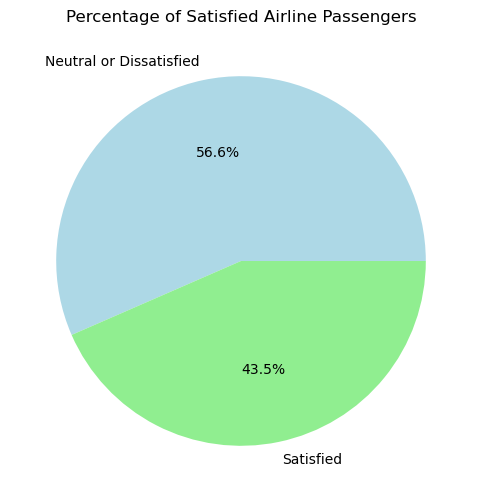

In [13]:
plt.figure(figsize=(8, 6))
satisf_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Satisfied Airline Passengers')
plt.ylabel('')
plt.show()

The analysis shows that 43.5% of customers are satisfied with services that this airline company provides. 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

### Q2: What is the customer profile for a repeating airline passenger?



To create a customer profile for a repeating airline passenger, we'll focus on analyzing passengers identified as "Returning" under the "Customer Type" column. 

In [19]:
# Filter the dataset for returning customers
returning_customers = df[df['Customer Type'] == 'Returning']

Let's extract relevant insights about these passengers to understand their characteristics and preferences.

In [20]:
# Age distribution
age_distribution = returning_customers['Age'].describe()

# Gender distribution
gender_distribution = returning_customers['Gender'].value_counts(normalize=True) * 100

print("Age Distribution:\n", age_distribution)
print("\nGender Distribution:\n", gender_distribution)

Age Distribution:
 count    105773.000000
mean         41.463625
std          15.135105
min           7.000000
25%          31.000000
50%          43.000000
75%          53.000000
max          85.000000
Name: Age, dtype: float64

Gender Distribution:
 Gender
Female    50.011818
Male      49.988182
Name: proportion, dtype: float64


In [21]:
# Type of Travel distribution
type_of_travel_distribution = returning_customers['Type of Travel'].value_counts(normalize=True) * 100

# Class distribution
class_distribution = returning_customers['Class'].value_counts(normalize=True) * 100

print("\nType of Travel Distribution:\n", type_of_travel_distribution)
print("\nClass Distribution:\n", class_distribution)


Type of Travel Distribution:
 Type of Travel
Business    62.331597
Personal    37.668403
Name: proportion, dtype: float64

Class Distribution:
 Class
Business        49.899313
Economy         42.094864
Economy Plus     8.005824
Name: proportion, dtype: float64


In [22]:
# Overall satisfaction distribution
satisfaction_distribution = returning_customers['Satisfaction'].value_counts(normalize=True) * 100

# Specific service ratings
service_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Gate Location',
    'Food and Drink', 'Online Boarding', 'Seat Comfort', 'In-flight Entertainment',
    'On-board Service', 'Leg Room Service', 'Baggage Handling', 'Check-in Service',
    'In-flight Service', 'In-flight Wifi Service', 'Cleanliness'
]

service_satisfaction = returning_customers[service_columns].mean().sort_values()

print("\nOverall Satisfaction Distribution:\n", satisfaction_distribution)
print("\nService Satisfaction Ratings:\n", service_satisfaction)


Overall Satisfaction Distribution:
 Satisfaction
Neutral or Dissatisfied    52.186286
Satisfied                  47.813714
Name: proportion, dtype: float64

Service Satisfaction Ratings:
 In-flight Wifi Service                    2.732247
Ease of Online Booking                    2.768854
Gate Location                             2.974095
Departure and Arrival Time Convenience    3.206934
Food and Drink                            3.240657
Check-in Service                          3.324979
Cleanliness                               3.336872
Online Boarding                           3.373800
Leg Room Service                          3.380296
On-board Service                          3.416136
In-flight Entertainment                   3.425127
Seat Comfort                              3.539268
Baggage Handling                          3.617908
In-flight Service                         3.629244
dtype: float64


In [23]:
# Departure delay statistics
departure_delay = returning_customers['Departure Delay'].describe()

# Arrival delay statistics
arrival_delay = returning_customers['Arrival Delay'].describe()

print("\nDeparture Delay Statistics:\n", departure_delay)
print("\nArrival Delay Statistics:\n", arrival_delay)


Departure Delay Statistics:
 count    105773.000000
mean         14.569181
std          38.044553
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64

Arrival Delay Statistics:
 count    105773.000000
mean         15.004973
std          38.552532
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64


Visualizations:

Based on these insights, we can create visualizations for better understanding:

Demographic Distribution:

Age: Histogram

Gender: Pie Chart



Travel Preferences:

Type of Travel: Bar Chart

Class Preferences: Bar Chart



Satisfaction Levels:

Overall Satisfaction: Pie Chart

Service Ratings: Bar Chart



Delays:

Departure and Arrival Delays: Box Plot

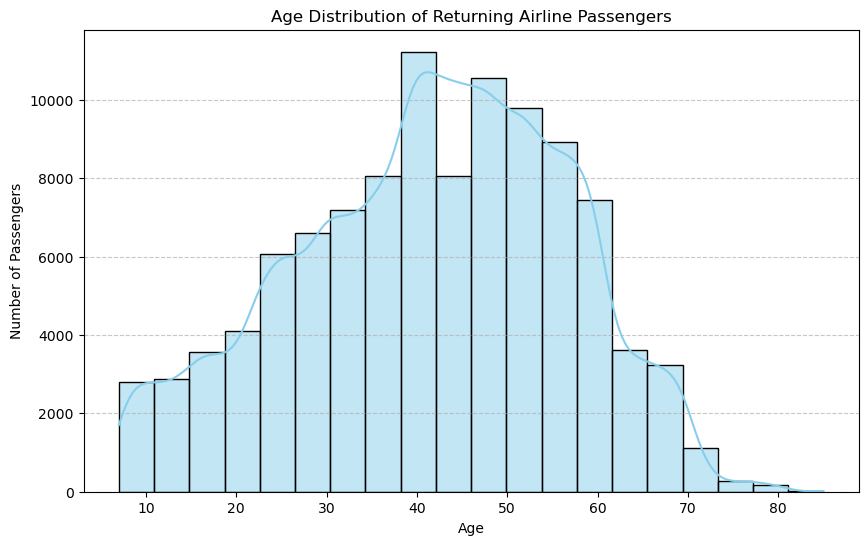

In [24]:

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(returning_customers['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Returning Airline Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Age Distribution: Most returning passengers are in the 30 to 55 age range, indicating a mature demographic.


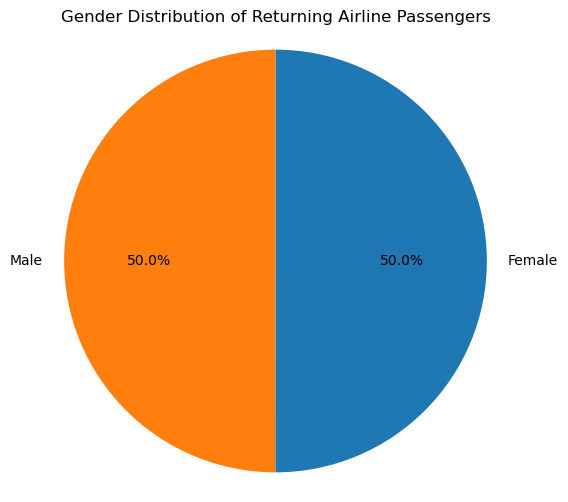

In [25]:
# Gender Distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Gender Distribution of Returning Airline Passengers')
plt.axis('equal')
plt.show()

Gender Distribution: The gender split is almost equal, with a slight tilt towards female passengers.

In [32]:
import warnings

# Hide FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

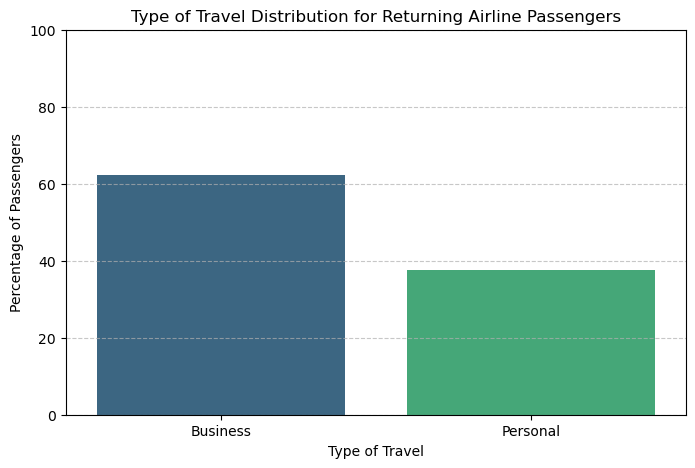

In [33]:
# Type of Travel Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=type_of_travel_distribution.index, y=type_of_travel_distribution.values, palette='viridis')
plt.title('Type of Travel Distribution for Returning Airline Passengers')
plt.xlabel('Type of Travel')
plt.ylabel('Percentage of Passengers')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Type of Travel: A significant portion of returning passengers travel for business purposes (62.3%), indicating a focus on professional trips.

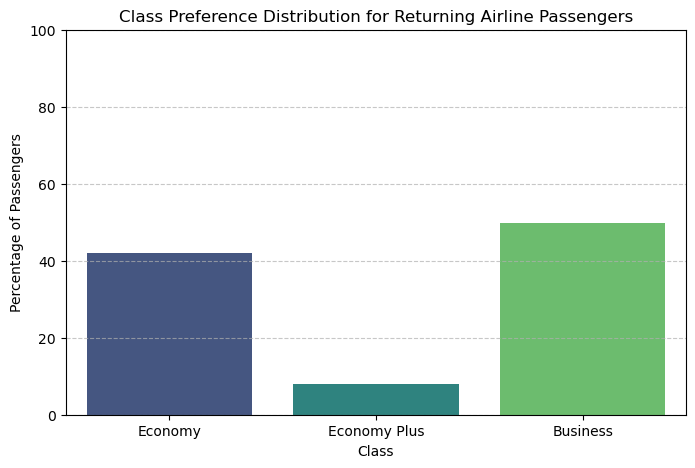

In [34]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Preference Distribution for Returning Airline Passengers')
plt.xlabel('Class')
plt.ylabel('Percentage of Passengers')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Class Preferences: Business Class is the most preferred (49.9%), followed by Economy (42.1%), and a smaller portion opt for Economy Plus (8%).

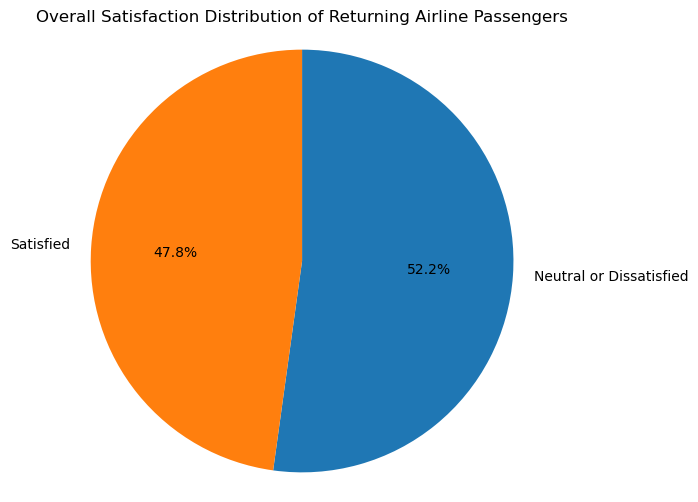

In [28]:
# Overall Satisfaction Distribution
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_distribution, labels=satisfaction_distribution.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Overall Satisfaction Distribution of Returning Airline Passengers')
plt.axis('equal')
plt.show()

The overall satisfaction distribution of returning airline passengers is as follows:

Neutral or Dissatisfied: 52.19%
Satisfied: 47.81%
The pie chart provides a visual representation of this distribution, showing that a slight majority of returning passengers are either neutral or dissatisfied with their overall experience.

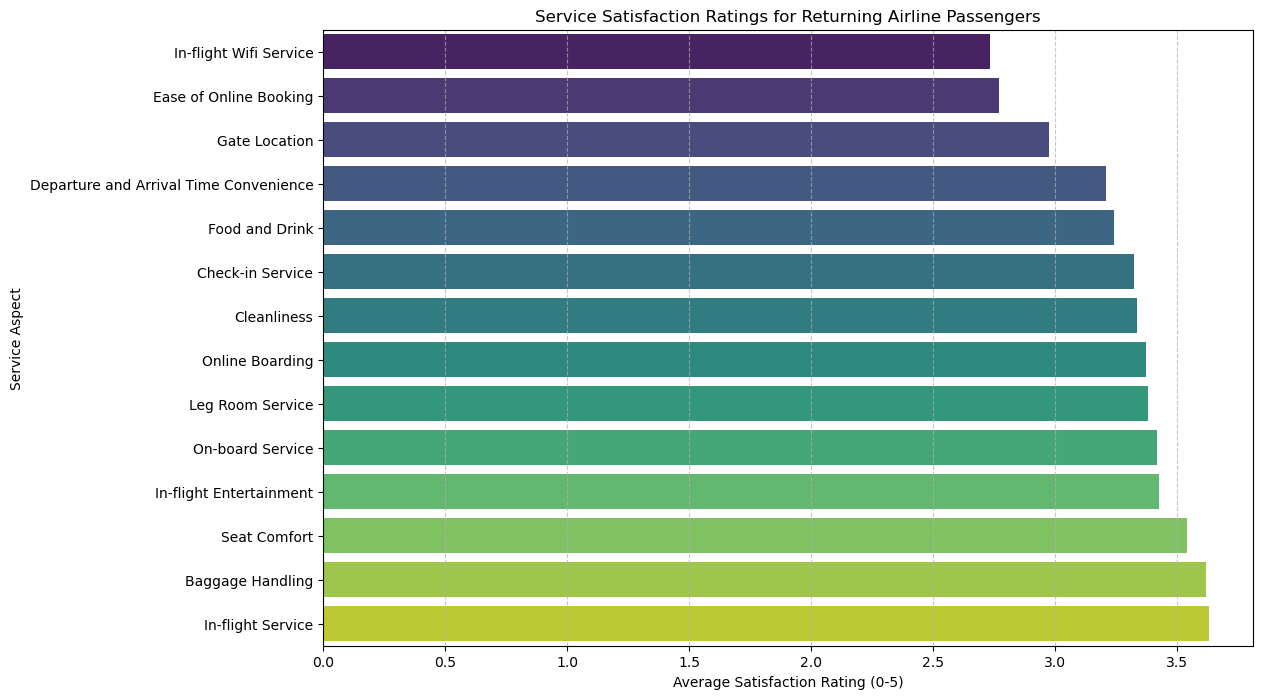

In [35]:
# Specific Service Ratings
plt.figure(figsize=(12, 8))
sns.barplot(x=service_satisfaction.values, y=service_satisfaction.index, palette='viridis')
plt.title('Service Satisfaction Ratings for Returning Airline Passengers')
plt.xlabel('Average Satisfaction Rating (0-5)')
plt.ylabel('Service Aspect')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The service satisfaction ratings for returning airline passengers are as follows (average ratings on a scale of 0 to 5):

In-flight Wifi Service: 2.73

Ease of Online Booking: 2.77

Gate Location: 2.97

Departure and Arrival Time Convenience: 3.21

Food and Drink: 3.24

Check-in Service: 3.32

Cleanliness: 3.34

Online Boarding: 3.37

Leg Room Service: 3.38

On-board Service: 3.42

In-flight Entertainment: 3.43

Seat Comfort: 3.54

Baggage Handling: 3.62

In-flight Service: 3.63


The bar chart visualizes these ratings, highlighting the areas where passengers are most and least satisfied.

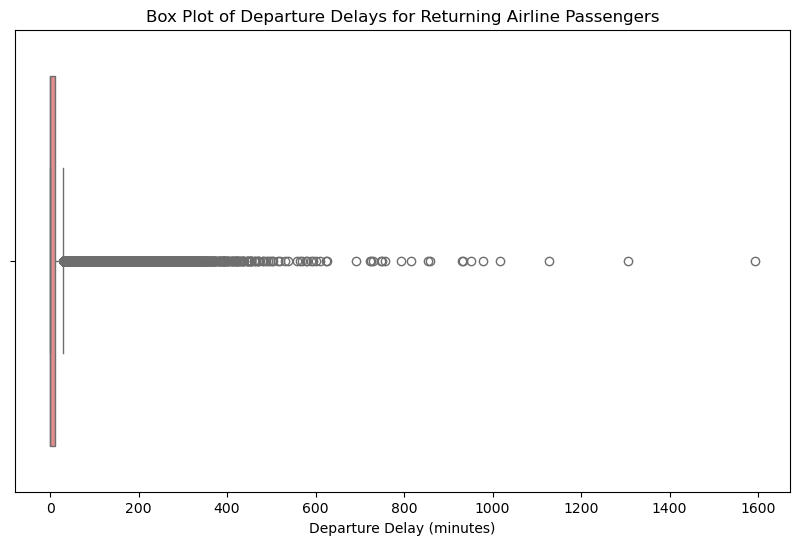

In [30]:
# Departure Delay
plt.figure(figsize=(10, 6))
sns.boxplot(x=returning_customers['Departure Delay'], color='lightcoral')
plt.title('Box Plot of Departure Delays for Returning Airline Passengers')
plt.xlabel('Departure Delay (minutes)')
plt.show()

Departure Delay Statistics:

Count: 106,100 (number of departure delay observations)

Mean: 14.64 minutes (average departure delay)

Standard Deviation: 38.20 minutes (variability in departure delay times)

Minimum: 0 minutes (no delay)

25th Percentile (Q1): 0 minutes (25% of flights have no delay)

Median (Q2): 0 minutes (50% of flights have no delay)

75th Percentile (Q3): 12 minutes (75% of flights have delays less than or equal to 12 minutes)

Maximum: 1592 minutes (maximum recorded delay)

Box Plot Interpretation:

Median Line: The thick line within the box represents the median departure delay, which is 0 minutes, indicating that more than half of the flights have no departure delay.

Interquartile Range (IQR): The box represents the middle 50% of the data, with the lower edge at the 25th percentile (0 minutes) and the upper edge at the 75th percentile (12 minutes).

Whiskers: The lines extending from the box represent the range of the data, excluding outliers. The lower whisker is at 0 minutes, and the upper whisker extends up to a point that is 1.5 times the IQR from the 75th percentile.

Outliers: Individual points beyond the whiskers represent outliers, indicating flights with unusually long departure delays.

The box plot visually summarizes the distribution of departure delays, highlighting that a significant number of flights experience no delay, while a few flights have substantially long delays.

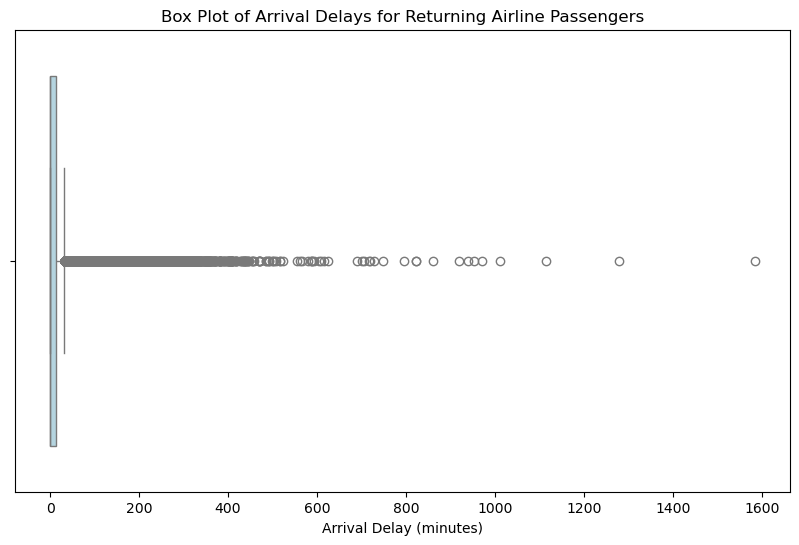

In [31]:
# Arrival Delay
plt.figure(figsize=(10, 6))
sns.boxplot(x=returning_customers['Arrival Delay'], color='lightblue')
plt.title('Box Plot of Arrival Delays for Returning Airline Passengers')
plt.xlabel('Arrival Delay (minutes)')
plt.show()

Arrival Delay Statistics:

Count: 105,773 (number of arrival delay observations)

Mean: 15.00 minutes (average arrival delay)

Standard Deviation: 38.55 minutes (variability in arrival delay times)

Minimum: 0 minutes (no delay)

25th Percentile (Q1): 0 minutes (25% of flights have no delay)

Median (Q2): 0 minutes (50% of flights have no delay)

75th Percentile (Q3): 13 minutes (75% of flights have delays less than or equal to 13 minutes)

Maximum: 1584 minutes (maximum recorded delay)

Box Plot Interpretation:

Median Line: The thick line within the box represents the median arrival delay, which is 0 minutes, indicating that more than half of the flights have no arrival delay.

Interquartile Range (IQR): The box represents the middle 50% of the data, with the lower edge at the 25th percentile (0 minutes) and the upper edge at the 75th percentile (13 minutes).

Whiskers: The lines extending from the box represent the range of the data, excluding outliers. The lower whisker is at 0 minutes, and the upper whisker extends up to a point that is 1.5 times the IQR from the 75th percentile.

Outliers: Individual points beyond the whiskers represent outliers, indicating flights with unusually long arrival delays.

The box plot visually summarizes the distribution of arrival delays, highlighting that a significant number of flights experience no delay, while a few flights have substantially long delays.

### Q3: Does flight distance affect customer preferences or flight patterns?

In [37]:
# ensure the Flight Distance to numeric and remove all the blanks.
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'], errors='coerce')
df = df.dropna(subset=['Flight Distance','Class'])

In [38]:
# Define the order from the 'Class' column
class_order = ['Economy', 'Economy Plus', 'Business']

# Reorder the 'Class' column
df['Class'] = pd.Categorical(df['Class'],categories=class_order, ordered=True)

Text(0, 0.5, 'Class')

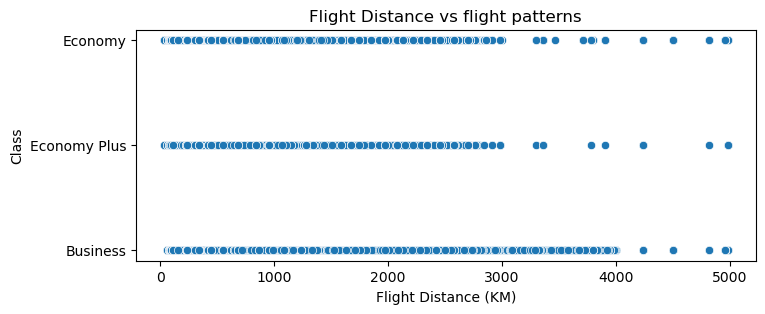

In [39]:
plt.figure(figsize=(8,3))
sns.scatterplot(x ='Flight Distance', y = 'Class',data = df)

# Add title and label
plt.title('Flight Distance vs flight patterns')
plt.xlabel('Flight Distance (KM)')
plt.ylabel('Class')

If the flight distance is less than 3000 km, the flight patterns are similar. However, for distances greater than 3000 km, a higher proportion of passengers choose business class.